In [7]:
import pandas as np
Salary = np.read_csv(r"C:\Users\rafyq\OneDrive\Desktop\Sal_vs_Exp.csv")
Salary

,Years of Experience,Salary
0,0,1036
1,0,1041
2,0,1054
3,0,1069
4,0,1110
...,...,...
4995,29,99841
4996,29,99934
4997,29,99940
4998,29,99941


In [13]:
# objective function
def objective(x = 'Years of Experience', y = 'Salary'):
    return x + y

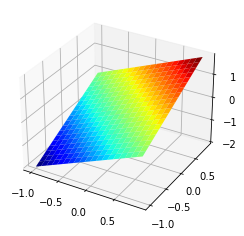

In [14]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

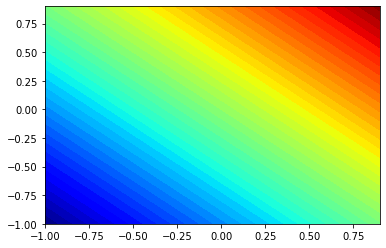

In [15]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot


# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [21]:
# gradient descent optimization with nesterov momentum for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed



# derivative of objective function
def derivative(x, y):
    return asarray([x, y])

# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
# generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# list of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
# run the gradient descent
    for it in range(n_iter):
# calculate the projected solution
        projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
# calculate the gradient for the projection
        gradient = derivative(projected[0], projected[1])
# build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
# calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
# calculate the new position in this variable
            value = solution[i] + change[i]
# store this variable
            new_solution.append(value)
# evaluate candidate point
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])
# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with nesterov momentum
best, score = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14936039  0.39658409]) = 0.17959
>1 f([-0.12994354  0.34502816]) = 0.13593
>2 f([-0.11170664  0.29660524]) = 0.10045
>3 f([-0.09561201  0.25387053]) = 0.07359
>4 f([-0.08170526  0.2169451 ]) = 0.05374
>5 f([-0.06977991  0.18528073]) = 0.03920
>6 f([-0.05958208  0.15820327]) = 0.02858
>7 f([-0.05087045  0.13507203]) = 0.02083
>8 f([-0.04343127  0.1153194 ]) = 0.01518
>9 f([-0.03707956  0.09845424]) = 0.01107
>10 f([-0.03165665  0.08405523]) = 0.00807
>11 f([-0.02702679  0.07176197]) = 0.00588
>12 f([-0.02307405  0.06126659]) = 0.00429
>13 f([-0.01969941  0.05230618]) = 0.00312
>14 f([-0.01681831  0.04465625]) = 0.00228
>15 f([-0.01435859  0.03812515]) = 0.00166
>16 f([-0.0122586   0.03254923]) = 0.00121
>17 f([-0.01046575  0.02778881]) = 0.00088
>18 f([-0.0089351   0.02372462]) = 0.00064
>19 f([-0.00762832  0.02025482]) = 0.00047
>20 f([-0.00651265  0.0172925 ]) = 0.00034
>21 f([-0.00556016  0.01476342]) = 0.00025
>22 f([-0.00474697  0.01260423]) = 0.00018
>23 f([-0.00405271  0

In [22]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
# track all solutions
    solutions = list()
# generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# list of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
# run the gradient descent
    for it in range(n_iter):
# calculate the projected solution
        projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
# calculate the gradient for the projection
        gradient = derivative(projected[0], projected[1])
# build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
# calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
# calculate the new position in this variable
            value = solution[i] + change[i]
# store this variable
            new_solution.append(value)
# store the new solution
        solution = asarray(new_solution)
        solutions.append(solution)
# evaluate candidate point
        solution_eval = objective(solution[0], solution[1])
# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions

In [18]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)

>0 f([-0.16263687  0.43183601]) = 0.26920
>1 f([-0.15678194  0.41628991]) = 0.25951
>2 f([-0.14905604  0.39577597]) = 0.24672
>3 f([-0.14001781  0.37177753]) = 0.23176
>4 f([-0.13013149  0.34552719]) = 0.21540
>5 f([-0.11977798  0.31803639]) = 0.19826
>6 f([-0.10926527  0.29012287]) = 0.18086
>7 f([-0.09883799  0.26243621]) = 0.16360
>8 f([-0.08868625  0.23548115]) = 0.14679
>9 f([-0.07895356  0.20963876]) = 0.13069
>10 f([-0.06974406  0.18518555]) = 0.11544
>11 f([-0.06112894  0.16231052]) = 0.10118
>12 f([-0.0531521   0.14113029]) = 0.08798
>13 f([-0.04583521  0.12170238]) = 0.07587
>14 f([-0.03918207  0.10403685]) = 0.06485
>15 f([-0.03318236  0.08810634]) = 0.05492
>16 f([-0.02781495  0.0738547 ]) = 0.04604
>17 f([-0.0230506   0.06120431]) = 0.03815
>18 f([-0.01885433  0.05006232]) = 0.03121
>19 f([-0.01518737  0.04032576]) = 0.02514
>20 f([-0.01200873  0.03188577]) = 0.01988
>21 f([-0.0092765   0.02463111]) = 0.01535
>22 f([-0.0069489   0.01845084]) = 0.01150
>23 f([-0.00498509  0

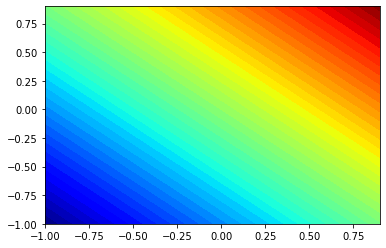

In [19]:
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

>0 f([-0.16429643  0.4362425 ]) = 0.27195
>1 f([-0.16133909  0.42839013]) = 0.26705
>2 f([-0.15738349  0.41788716]) = 0.26050
>3 f([-0.15267682  0.40538993]) = 0.25271
>4 f([-0.14742237  0.39143823]) = 0.24402
>5 f([-0.14178662  0.3764741 ]) = 0.23469
>6 f([-0.13590524  0.36085776]) = 0.22495
>7 f([-0.12988814  0.34488105]) = 0.21499
>8 f([-0.12382371  0.32877868]) = 0.20495
>9 f([-0.11778244  0.31273782]) = 0.19496
>10 f([-0.11181994  0.29690608]) = 0.18509
>11 f([-0.10597943  0.28139828]) = 0.17542
>12 f([-0.10029396  0.26630212]) = 0.16601
>13 f([-0.09478813  0.25168294]) = 0.15689
>14 f([-0.08947962  0.23758772]) = 0.14811
>15 f([-0.08438049  0.22404843]) = 0.13967
>16 f([-0.07949818  0.21108483]) = 0.13159
>17 f([-0.0748364  0.1987068]) = 0.12387
>18 f([-0.07039591  0.18691634]) = 0.11652
>19 f([-0.06617508  0.17570913]) = 0.10953
>20 f([-0.06217044  0.16507593]) = 0.10291
>21 f([-0.05837705  0.15500368]) = 0.09663
>22 f([-0.05478892  0.14547642]) = 0.09069
>23 f([-0.05139923  0.1

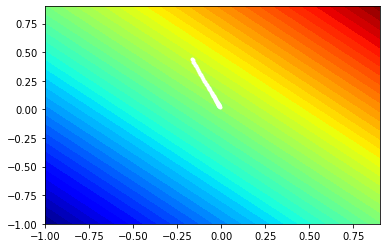

In [24]:

# example of plotting the nesterov momentum search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
    return x + y
 
# derivative of objective function
def derivative(x, y):
    return asarray([x , y ])
 
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
# track all solutions
    solutions = list()
# generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# list of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
# run the gradient descent
    for it in range(n_iter):
# calculate the projected solution
        projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
# calculate the gradient for the projection
        gradient = derivative(projected[0], projected[1])
# build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
# calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
# calculate the new position in this variable
            value = solution[i] + change[i]
# store this variable
            new_solution.append(value)
# store the new solution
        solution = asarray(new_solution)
        solutions.append(solution)
# evaluate candidate point
        solution_eval = objective(solution[0], solution[1])
# report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
solutions = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()